# Capsone Project Program B412

### Creating clusters using emotional data

#### by Leonardo Patricelli

First of all let's import the dataset

In [1]:
import pandas as pd

movie = pd.read_csv("student_movie_attributes.csv")

Let's have a look to the columns' names.

In [2]:
movie.columns

Index(['survey_date', 'etl_run_guid', 'content_type', 'respondent_id',
       'movie_id', 'movie_name', 'wave_id', 'User_feat_1', 'User_feat_2',
       'User_feat_3', 'User_feat_4', 'User_feat_5', 'User_feat_6',
       'User_feat_7', 'User_feat_8', 'User_feat_9', 'User_feat_10',
       'User_feat_11', 'sent_1', 'sent_2', 'sent_3', 'sent_4', 'sent_5',
       'sent_6', 'sent_7', 'sent_8', 'sent_9', 'sent_10', 'sent_11', 'sent_12',
       'sent_13', 'sent_14', 'sent_15', 'sent_16', 'sent_17', 'sent_18',
       'sent_19', 'sent_20', 'sent_21', 'sent_22', 'sent_23', 'sent_24',
       'sent_25', 'sent_26', 'sent_27', 'sent_28', 'sent_29', 'sent_30',
       'sent_31', 'sent_32', 'sent_33', 'sent_34', 'sent_35', 'sent_36'],
      dtype='object')

In [3]:
names = movie[['movie_id', 'movie_name']]

count of respondents per movie

In [4]:
value_counts = movie['movie_id'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['movie_id', 'respondents_count'] # change column names
df_value_counts

,movie_id,respondents_count
0,9806,434
1,12042,414
2,9777,342
3,9714,336
4,12038,298
...,...,...
3208,10461,22
3209,9996,22
3210,10989,21
3211,13462,21


Create a list with all the movies with more than 50 respondents

In [5]:
movie_list = df_value_counts[df_value_counts['respondents_count'] > 49].movie_id

Filter the movie dataset with the list just created

In [6]:
movie = movie[movie['movie_id'].isin(movie_list)]

In [7]:
names = names[names['movie_id'].isin(movie_list)]

In [8]:
value_counts = movie['movie_id'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['movie_id', 'respondents_count'] # change column names
df_value_counts

,movie_id,respondents_count
0,9806,434
1,12042,414
2,9777,342
3,9714,336
4,12038,298
...,...,...
2613,11302,50
2614,10684,50
2615,10917,50
2616,10837,50


Now we can group by the movies by sentimet. In this way we can have a percentage related to each sentimet per movie.

In [9]:
movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_3', 'sent_4', 'sent_5',
       'sent_6', 'sent_7', 'sent_8', 'sent_9', 'sent_10', 'sent_11', 'sent_12',
       'sent_13', 'sent_14', 'sent_15', 'sent_16', 'sent_17', 'sent_18',
       'sent_19', 'sent_20', 'sent_21', 'sent_22', 'sent_23', 'sent_24',
       'sent_25', 'sent_26', 'sent_27', 'sent_28', 'sent_29', 'sent_30',
       'sent_31', 'sent_32', 'sent_33', 'sent_34', 'sent_35', 'sent_36'].mean()

movie_sent.set_index(movie_sent.movie_id, inplace=True)
movie_sent = movie_sent.drop(columns=['movie_id'])

<ipython-input-9-1a9436d1745e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_3', 'sent_4', 'sent_5',


Let's use a correlation matrix to evaluate the correlation between sentiments.

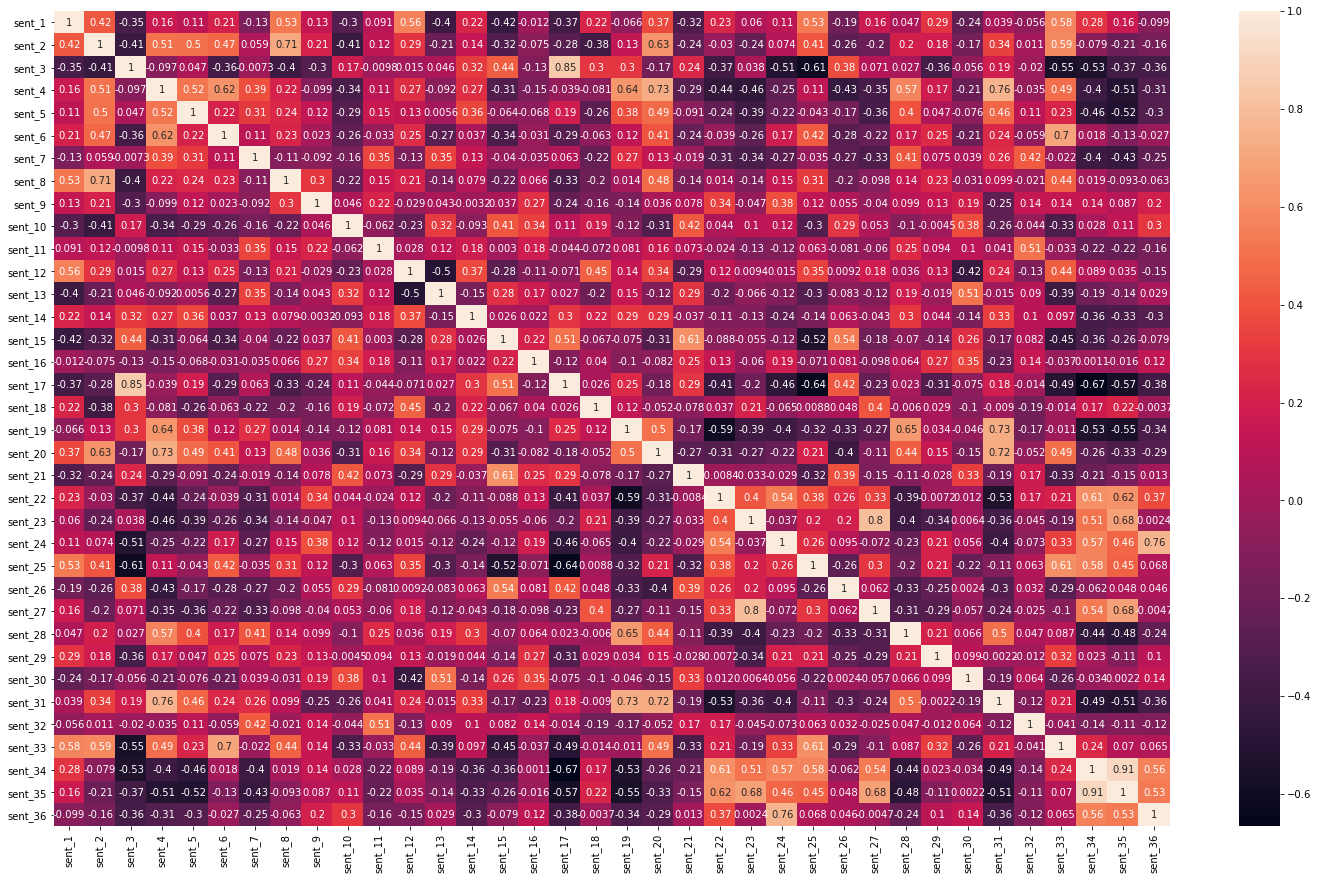

In [10]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(25,15))

c= movie_sent.corr()
sns.heatmap(c, annot=True)

It seems that sentiment 3, 17,34,35   have a very high correlation (over 0.85). Let's remove those variable because they could lead to multicollinearity problems. To do, we are going to combine them together, so that there is no loss of information.

### Combining Sentiments

The variables are all binary. to combine them together, we just need to sum the columns with each other. This will lead to 3 values : 
- 0: the movie is neither 3 or 17
- 1: the movie is just 3 or 17
- 2: the movie is both 3 and 17

We decided to combine together 1 and 2 because just about 10% of the dataset has value "2". Including also the 1s increases the number of elements in the group, limiting the loss of information.

In [11]:
movie['sent_3_17'] = movie['sent_3'] + movie['sent_17']
print("sent_3 value counts")
print( movie['sent_3'].value_counts())
print("sent_17 value counts")
print( movie['sent_17'].value_counts())
print("sent_3_17 value counts")
print(movie['sent_3_17'].value_counts())

sent_3 value counts
0.0    177148
1.0     51835
Name: sent_3, dtype: int64
sent_17 value counts
0.0    158514
1.0     70469
Name: sent_17, dtype: int64
sent_3_17 value counts
0.0    137369
1.0     60924
2.0     30690
Name: sent_3_17, dtype: int64


In [12]:
movie['sent_3_17'] = movie['sent_3_17'].replace(2,1)
movie['sent_3_17'].value_counts()

0.0    137369
1.0     91614
Name: sent_3_17, dtype: int64

The variables are all binary. to combine them together, we just need to sum the columns with each other. This will lead to 3 values : 
- 0: the movie is neither 34 or 35
- 1: the movie is just 34 or 35
- 2: the movie is both 34 and 35

We decided to combine together 1 and 2 because just about 10% of the dataset has value "2". Including also the 1s increases the number of elements in the group, limiting the loss of information.

In [13]:
movie['sent_34_35'] = movie['sent_34'] + movie['sent_35']
print("sent_34 value counts")
print( movie['sent_34'].value_counts())
print("sent_35 value counts")
print( movie['sent_35'].value_counts())
print("sent_34_35 value counts")
print(movie['sent_34_35'].value_counts())

sent_34 value counts
0.0    173710
1.0     55273
Name: sent_34, dtype: int64
sent_35 value counts
0.0    177135
1.0     51848
Name: sent_35, dtype: int64
sent_34_35 value counts
0.0    149911
1.0     51023
2.0     28049
Name: sent_34_35, dtype: int64


In [14]:
movie['sent_34_35'] = movie['sent_34_35'].replace(2,1)
movie['sent_34_35'].value_counts()

0.0    149911
1.0     79072
Name: sent_34_35, dtype: int64

## Sentiments Correlation Matrix

In [15]:
movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_4', 'sent_5',
       'sent_6', 'sent_7', 'sent_8', 'sent_9', 'sent_10', 'sent_11', 'sent_12',
       'sent_13', 'sent_14', 'sent_15', 'sent_16', 'sent_18',
       'sent_19', 'sent_20', 'sent_21', 'sent_22', 'sent_23', 'sent_24',
       'sent_25', 'sent_26', 'sent_27', 'sent_28', 'sent_29', 'sent_30',
       'sent_31', 'sent_32', 'sent_33', 'sent_36', 'sent_3_17', 'sent_34_35'].mean()

movie_sent.set_index(movie_sent.movie_id, inplace=True)
movie_sent = movie_sent.drop(columns=['movie_id'])

<ipython-input-15-b7a0c3cd3def>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_4', 'sent_5',


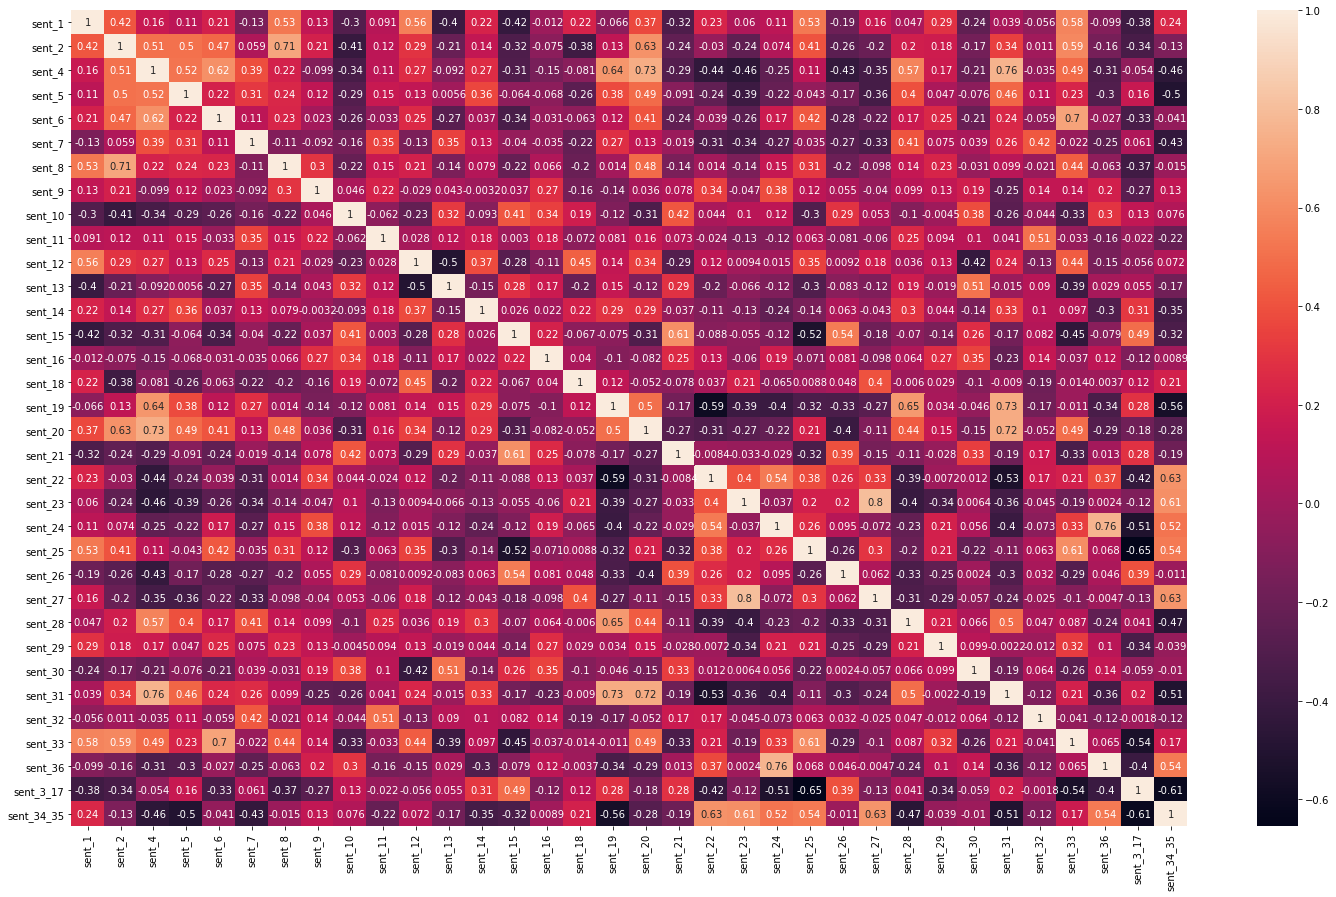

In [16]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(25,15))

c= movie_sent.corr()
sns.heatmap(c, annot=True)

In [17]:
movie_FA = movie_sent.copy()

## Factor Analysis

First of all let's standardize the variables

In [18]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

movie_FA = pd.DataFrame(StandardScaler().fit_transform(movie_FA))

To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. An eigenvalue of 2.5 means that the factor would explain the variance of 2.5 variables, and so on.

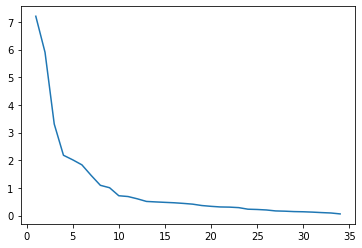

In [19]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(movie_FA, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,movie_FA.shape[1]+1),ev)

In [20]:
pd.DataFrame(ev.cumsum())

,0
0,7.202073
1,13.102117
2,16.408425
3,18.586572
4,20.600427
5,22.431909
6,23.882894
7,24.975236
8,25.979993
9,26.695077


I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.

In [21]:
fa = FactorAnalyzer(10, rotation='varimax')
fa.fit(movie_FA)
loads = fa.loadings_
loadings_FA = pd.DataFrame(loads, columns=['F1', 'F2', 'F3','F4', 'F5',
                                                       'F6', 'F7','F8', 'F9', 'F10'],
                          index = movie_sent.columns.values.tolist())

loadings_FA

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
sent_1,-0.090253,0.510667,-0.330058,0.049885,-0.024626,0.554980,0.145204,-0.083504,0.025054,0.049695
sent_2,0.240209,0.774613,-0.107285,-0.102392,-0.001720,-0.056503,0.336986,-0.208285,0.054057,0.094147
sent_4,0.740584,0.122504,-0.181655,-0.212471,-0.133221,0.036494,0.488315,-0.161771,0.070419,-0.031744
sent_5,0.479451,0.301544,0.078774,-0.228155,-0.139025,-0.048244,0.102588,-0.179195,0.201703,0.224252
sent_6,0.185944,0.123868,-0.173758,-0.170295,0.043749,0.054535,0.770172,-0.105813,-0.051252,0.024615
sent_7,0.298153,-0.174515,-0.173964,-0.255945,-0.183361,-0.215635,0.077700,-0.009139,0.575725,-0.042762
sent_8,0.058296,0.805295,-0.157589,-0.081329,0.018193,0.081528,0.069617,0.059239,-0.009177,0.062676
sent_9,-0.082063,0.315287,0.024576,0.002940,0.278784,-0.020508,0.014076,0.253295,0.154940,0.461042
sent_10,-0.086589,-0.232917,0.315174,0.072888,0.184830,-0.007198,-0.132897,0.558649,-0.108018,-0.130115
sent_11,0.101370,0.139596,-0.041945,-0.041790,-0.066135,0.073145,-0.079055,0.154479,0.619201,0.066556


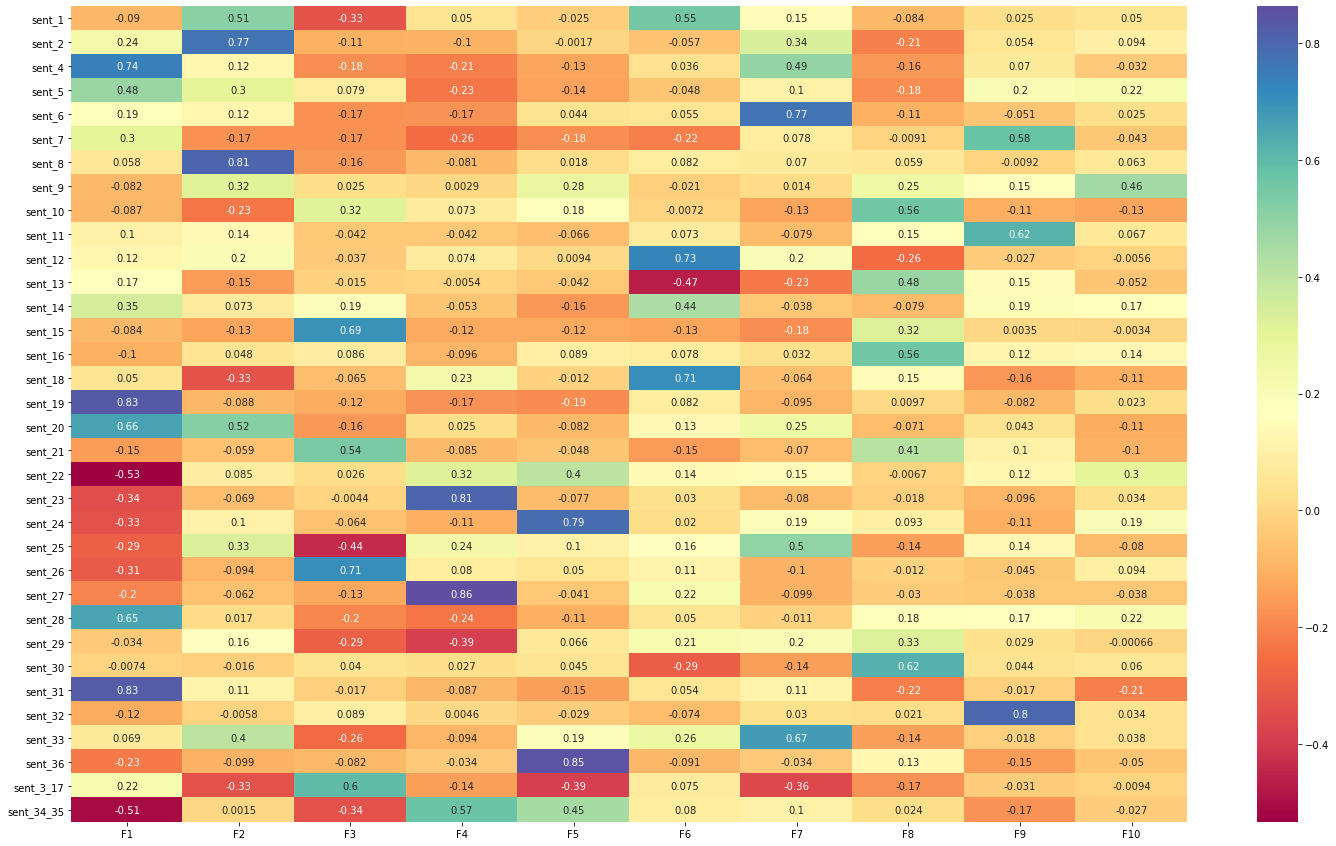

In [22]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = pyplot.subplots(figsize=(25,15))

ax = sns.heatmap(loadings_FA, annot=True, cmap='Spectral')
plt.show()

The higher a factor loading, the more important a variable is for said factor. We can use this information to build new variables.

## Creating new variables

In [23]:
movie['sent_8_2_1_20'] = (movie['sent_8'] + movie['sent_2'] + movie['sent_1'] + movie['sent_20'])/4
movie['sent_3_17_26_15'] = (movie['sent_3_17'] + movie['sent_26'] + movie['sent_15'])/3
movie['sent_23_34_35_27'] = (movie['sent_23'] + movie['sent_34_35'] + movie['sent_27'])/3
movie['sent_24_22_34_35'] = (movie['sent_36'] + movie['sent_24'] + movie['sent_22'] + movie['sent_34_35'])/4
movie['sent_12_18_14_1'] = (movie['sent_12'] + movie['sent_18'] + movie['sent_14'] + movie['sent_1'])/4
movie['sent_6_25_33_4'] = (movie['sent_6'] + movie['sent_25'] + movie['sent_33'] + movie['sent_4'])/4
movie['sent_10_16_30_13'] = (movie['sent_10'] + movie['sent_16'] + movie['sent_30'] + movie['sent_13'])/4
movie['sent_32_11_7'] = (movie['sent_32'] + movie['sent_11'] + movie['sent_7'])/3
movie['sent_4_19_31'] = (movie['sent_4'] + movie['sent_19'] + movie['sent_31'])/3
movie['sent_9_22'] = (movie['sent_9'] + movie['sent_22'])/2


In [24]:
movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_4', 'sent_5',
       'sent_6', 'sent_7', 'sent_8', 'sent_9', 'sent_10', 'sent_11', 'sent_12',
       'sent_13', 'sent_14', 'sent_15', 'sent_16', 'sent_18',
       'sent_19', 'sent_20', 'sent_21', 'sent_22', 'sent_23', 'sent_24',
       'sent_25', 'sent_26', 'sent_27', 'sent_28', 'sent_29', 'sent_30',
       'sent_31', 'sent_32', 'sent_33', 'sent_36', 'sent_3_17', 'sent_34_35',
       'sent_8_2_1_20', 'sent_3_17_26_15', 'sent_23_34_35_27', 'sent_24_22_34_35', 'sent_12_18_14_1', 'sent_6_25_33_4',
       'sent_10_16_30_13', 'sent_32_11_7', 'sent_4_19_31', 'sent_9_22'].mean()

movie_sent.set_index(movie_sent.movie_id, inplace=True)
movie_sent = movie_sent.drop(columns=['movie_id'])

<ipython-input-24-c8a48d2436cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_sent = movie.groupby("movie_id", as_index=False)['sent_1', 'sent_2', 'sent_4', 'sent_5',


Descriptive statistics of the dataset, including new variables

In [25]:
pd.set_option("display.max_rows", 10, "display.max_columns", None)

movie_sent.describe()

,sent_1,sent_2,sent_4,sent_5,sent_6,sent_7,sent_8,sent_9,sent_10,sent_11,sent_12,sent_13,sent_14,sent_15,sent_16,sent_18,sent_19,sent_20,sent_21,sent_22,sent_23,sent_24,sent_25,sent_26,sent_27,sent_28,sent_29,sent_30,sent_31,sent_32,sent_33,sent_36,sent_3_17,sent_34_35,sent_8_2_1_20,sent_3_17_26_15,sent_23_34_35_27,sent_24_22_34_35,sent_12_18_14_1,sent_6_25_33_4,sent_10_16_30_13,sent_32_11_7,sent_4_19_31,sent_9_22
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,0.147332,0.103045,0.142791,0.086010,0.087904,0.131354,0.077679,0.029063,0.048129,0.045635,0.267257,0.086355,0.077816,0.064567,0.037150,0.155710,0.103520,0.116090,0.025229,0.117655,0.142908,0.076634,0.273964,0.067523,0.261948,0.049097,0.052806,0.036119,0.077044,0.071842,0.094382,0.079649,0.396267,0.344986,0.111036,0.176119,0.249948,0.154731,0.162029,0.149760,0.051938,0.082944,0.107785,0.073359
std,0.101229,0.092174,0.123753,0.064867,0.101301,0.180689,0.087724,0.032563,0.039579,0.051463,0.099019,0.053627,0.043654,0.051470,0.026169,0.094918,0.095262,0.094214,0.025010,0.081753,0.125480,0.094611,0.132295,0.060292,0.122977,0.049436,0.039353,0.029384,0.080726,0.088840,0.085336,0.137633,0.277646,0.238276,0.074968,0.112535,0.143804,0.114758,0.062125,0.085626,0.026871,0.086862,0.089672,0.048815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004115,0.012346,0.000000,0.030864,0.015152,0.000000,0.000000,0.000000,0.000000
25%,0.071429,0.036585,0.049383,0.038462,0.024691,0.020619,0.024390,0.000000,0.020202,0.012500,0.195122,0.049383,0.048193,0.029703,0.018562,0.084211,0.035139,0.048780,0.010204,0.050633,0.052083,0.012384,0.170416,0.025000,0.168573,0.012500,0.024390,0.012658,0.020408,0.012987,0.030928,0.010101,0.153257,0.115486,0.056250,0.084194,0.125000,0.055892,0.115854,0.089506,0.032051,0.020833,0.040161,0.034399
50%,0.123711,0.074074,0.104651,0.072289,0.052083,0.052632,0.050000,0.020000,0.039604,0.030303,0.256098,0.078431,0.073171,0.052083,0.033899,0.132075,0.070707,0.089854,0.020408,0.103896,0.101745,0.038898,0.261905,0.051546,0.242834,0.033333,0.044444,0.030612,0.050000,0.040816,0.068966,0.025316,0.318915,0.315143,0.091804,0.142272,0.229061,0.132353,0.153125,0.129630,0.048387,0.047619,0.080247,0.066265
75%,0.202101,0.142857,0.202703,0.119565,0.109465,0.147638,0.100000,0.040816,0.066667,0.061162,0.329412,0.113924,0.101266,0.086420,0.051282,0.207118,0.148936,0.160000,0.036585,0.173269,0.193354,0.105110,0.365854,0.090682,0.341325,0.072917,0.074074,0.051546,0.111111,0.095745,0.135417,0.076923,0.649351,0.561224,0.145408,0.263096,0.354331,0.227273,0.199356,0.189394,0.067708,0.115274,0.154472,0.107143
max,0.610000,0.489796,0.684932,0.445783,0.719512,0.875000,0.629630,0.253012,0.367347,0.474747,0.683544,0.376812,0.303797,0.414634,0.173077,0.571429,0.567901,0.657534,0.185185,0.464646,0.670732,0.589744,0.707317,0.447059,0.676768,0.360825,0.392857,0.181818,0.616438,0.810000,0.536842,0.750000,0.965909,0.869048,0.527500,0.536585,0.687243,0.579114,0.458861,0.563291,0.206633,0.546667,0.552511,0.301370


In [26]:
movie_PCA = movie_sent.copy()
movie_FA = movie_sent.copy()

## PCA

Standardization

In [27]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

movie_PCA = pd.DataFrame(StandardScaler().fit_transform(movie_PCA))
movie_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.416378,0.480964,0.802676,1.270701,-0.140396,1.661868,1.394648,2.017199,-0.684231,1.158880,-0.785684,1.530610,-0.094674,-0.231936,-0.615254,-0.420657,1.455058,0.555559,-0.167029,-0.280388,-0.551777,-0.476304,-0.479608,-0.770906,-0.075775,1.562287,0.530639,1.278690,-0.172051,0.494772,-0.365961,-0.196340,-0.138232,-0.785338,0.870926,-0.286715,-0.615845,-0.614630,-0.320762,-0.027937,0.711468,1.549888,0.832874,0.438026
1,-0.097149,0.916437,1.068537,1.179405,-0.621078,1.763837,0.254496,0.259153,0.047294,1.542467,-0.300573,1.653314,0.508269,-0.768887,-0.464386,-0.060168,1.537948,1.288912,-0.509057,-0.827712,-0.840198,-0.281565,-0.559190,-0.912788,-0.808827,1.282766,-0.071313,1.323478,0.749041,0.176280,-0.813195,-0.397141,-0.121642,-1.238238,0.728294,-0.380270,-1.158841,-0.967269,-0.093038,-0.216216,1.091029,1.587765,1.260930,-0.606673
2,-0.437110,-0.558813,0.845653,0.104444,-0.766126,2.354471,-0.297949,-0.892670,-0.434676,0.515615,-1.241680,1.850399,0.106721,0.347983,-1.025865,-1.097611,2.485054,0.299803,-0.596665,-1.061047,-0.974759,-0.810143,-1.369777,-1.120152,-0.537374,2.761054,0.754043,1.226975,1.983242,-0.112432,-0.743717,-0.578819,-0.127677,-1.231747,-0.312291,-0.251993,-1.117014,-1.168874,-1.073330,-0.635437,0.848802,1.696087,1.864140,-1.186243
3,-0.831688,-0.090148,1.228054,-0.190049,-0.556121,2.535882,-0.405592,-0.892670,0.113797,-0.273176,-0.892010,2.904892,-0.094674,-0.231936,0.189377,-1.086176,2.339214,0.443810,0.253927,-1.310646,-1.139108,-0.810143,-1.275427,-1.120152,-1.359954,2.414158,-0.539497,0.562078,1.132150,-0.097771,-0.859460,-0.502323,-0.441592,-1.271377,-0.287678,-0.598567,-1.421187,-1.210962,-1.125743,-0.427549,1.690981,1.671096,1.733013,-1.395252
4,0.456638,1.332105,0.584041,1.326549,-0.337083,0.641873,1.198493,1.088961,0.414130,1.829813,-0.310076,0.394875,1.419814,0.416916,1.456888,-0.281113,0.493658,1.164772,2.001124,0.139193,-0.539147,-0.128107,-0.607966,-0.585018,0.668035,2.922533,0.570912,1.698639,-0.155222,0.280692,0.154070,-0.031832,0.121907,-0.680813,1.280156,0.059341,-0.342411,-0.364556,0.204502,-0.085119,1.168574,0.902142,0.396903,0.479770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,-1.039699,-0.775483,-0.813759,0.946090,-0.556121,-0.260961,-0.525608,-0.569351,-0.152213,-0.682335,0.809204,-1.021627,-0.094674,3.040914,-0.615254,-0.198817,-0.313253,-0.561933,2.358711,0.878652,0.622883,-0.476304,-1.275427,2.546930,-0.589447,-0.780360,-0.539497,-0.871144,-0.563311,0.968806,-0.982835,-0.502323,1.530248,-1.271377,-0.919644,2.176921,-0.689058,-0.752245,-0.193660,-1.196034,-0.953703,0.014586,-0.654311,0.545866
2614,1.801595,-0.641177,-0.354725,-0.648428,0.325581,-0.666273,-0.760365,-0.217609,-0.938548,-0.246199,2.184430,-0.995738,-0.020466,-1.041157,-1.419886,1.138314,-0.971512,-0.882444,-0.569482,3.534962,1.751442,1.164765,1.418115,-0.026360,1.802042,-0.548670,-0.783512,-1.229450,-0.818418,1.541815,1.340948,0.299623,-1.269165,1.826944,-0.088597,-1.207194,2.032159,1.907808,2.035518,0.849993,-1.524188,0.015030,-0.752798,2.887531
2615,-1.269296,-0.708673,-0.849074,-1.035263,-0.681623,-0.727101,-0.670533,0.266397,0.690987,-0.520216,-1.365461,0.852730,-1.782914,0.578558,-1.419886,-0.447864,-0.888788,-0.831817,0.500147,0.407260,-0.687924,3.179127,-1.072718,0.131861,-1.363185,-0.993328,-0.383015,0.697288,-0.954571,-0.171560,-0.442780,3.260410,-1.019693,1.244691,-1.103802,-0.726839,0.098788,2.351450,-1.545420,-1.033058,0.524806,-0.665399,-0.991771,0.429887
2616,-0.212888,-0.708673,-0.239098,-0.453413,0.187739,-0.692287,-0.598825,-0.892670,-0.898377,-0.397983,1.239188,-1.258699,-0.918316,-1.010267,-0.698754,2.799504,-0.294486,0.770623,-0.505913,-0.669975,0.916285,-0.743655,1.827768,-0.702815,2.012832,-0.738838,0.096527,-0.587204,-0.409103,-0.667209,-0

D is the number of PC necessary to reach the 95% of explained variance

In [28]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(movie_PCA)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

22

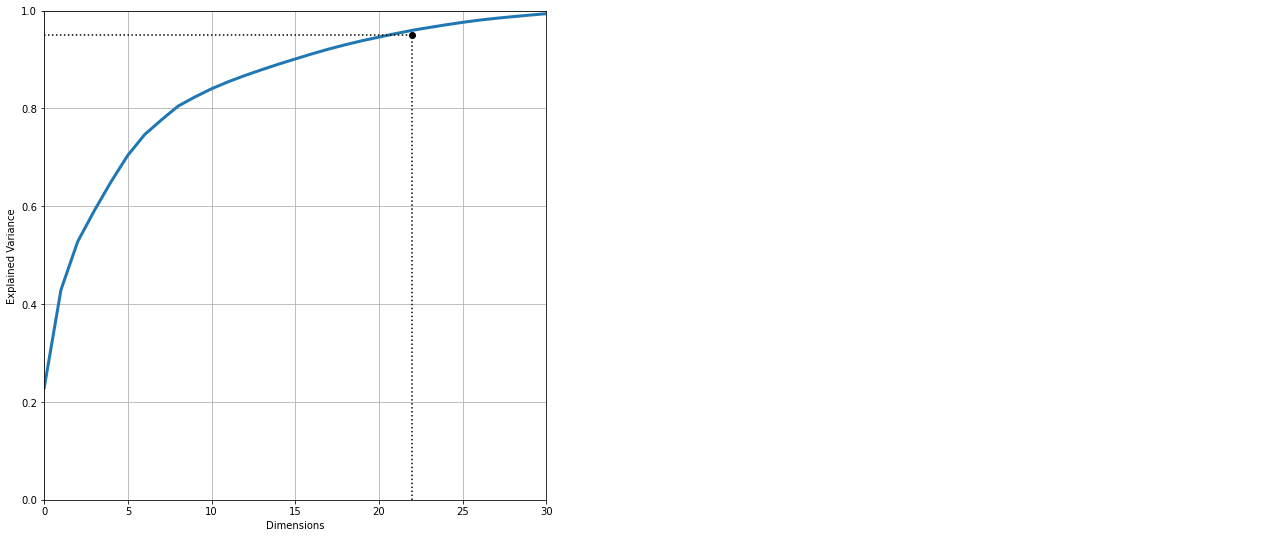

In [29]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Cumulated count of the variance explained by PC

In [30]:
pd.set_option("display.max_rows", 25, "display.max_columns", None)

(pd.DataFrame(np.array([pca.explained_variance_ratio_[:i].sum() for i in range(1, d+1)]).round(3)))

,0
0,0.229
1,0.429
2,0.528
3,0.591
4,0.650
5,0.704
6,0.746
7,0.776
8,0.805
9,0.823


8 PCA are able to explain the 80% of the variance. We can go on with 8 PC.

In [31]:
pd.set_option("display.max_rows", 15, "display.max_columns", None)

In [32]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(movie_PCA)
movie_PCA = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5',
                                                       'PC6', 'PC7','PC8'])

movie_PCA.index=movie_sent.index

movie_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
movie_id,,,,,,,,
8984,2.684844,-1.177395,3.045021,0.885926,1.069739,1.201016,-1.239309,1.447406
8985,3.703807,-2.445021,2.290725,0.087083,0.991434,1.876783,-0.631376,1.152280
8986,3.593676,-4.537416,1.976992,-2.001974,1.459390,1.960441,0.040020,1.169996
8987,3.340669,-4.825022,2.763717,-2.372247,1.055301,2.076859,0.007248,0.714222
8988,2.146108,-0.968814,2.944443,2.951860,-0.734788,2.191847,-1.458738,0.867821
...,...,...,...,...,...,...,...,...
13526,-2.085659,-3.582555,-2.083299,2.812680,-0.674380,-3.311438,0.282392,0.029499
13527,-2.556492,6.684692,-2.213015,1.736763,2.344269,-0.048909,1.908848,1.490296
13528,-4.942758,0.295272,2.736556,-2.985200,-1.594397,-1.527107,1.200290,1.540913


### PCA Loadings

In [33]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5',
                                                       'PC6', 'PC7','PC8'],
             index = movie_sent.columns.values.tolist())

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
sent_1,0.097956,0.222760,-0.069657,0.209358,-0.042126,0.097188,-0.061351,-0.175108
sent_2,0.194492,0.142422,0.110543,0.065882,-0.059153,-0.159932,-0.286153,-0.005481
sent_4,0.282305,0.008409,0.026649,-0.097983,-0.014649,0.038036,0.077693,0.089603
sent_5,0.199119,-0.041990,0.067080,0.124250,-0.018083,-0.115350,-0.113557,0.239681
sent_6,0.162189,0.136225,0.076235,-0.103165,-0.066673,-0.096365,0.185540,-0.116946
...,...,...,...,...,...,...,...,...
sent_6_25_33_4,0.200916,0.206666,0.063919,-0.062829,0.015946,-0.032246,0.111484,-0.096790
sent_10_16_30_13,-0.115913,-0.146230,0.257728,0.010047,-0.114501,0.334646,-0.086290,-0.049788
sent_32_11_7,0.103724,-0.096427,0.215707,0.172270,0.396555,0.026109,0.192966,-0.007398
sent_4_19_31,0.278607,-0.059989,-0.035405,-0.112546,-0.047667,0.119965,0.028371,0.184807


### Correlation between PCA and sentiment

In [34]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5',
                                                       'PC6', 'PC7','PC8'],
             index = movie_sent.columns.values.tolist())
loading_matrix



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
sent_1,0.310976,0.660762,-0.145336,0.350327,-0.067929,0.149798,-0.083485,-0.200943
sent_2,0.617444,0.422460,0.230644,0.110243,-0.095385,-0.246508,-0.389392,-0.006290
sent_4,0.896219,0.024942,0.055602,-0.163959,-0.023622,0.058626,0.105723,0.102823
sent_5,0.632131,-0.124552,0.139959,0.207912,-0.029159,-0.177791,-0.154526,0.275042
sent_6,0.514891,0.404078,0.159061,-0.172631,-0.107510,-0.148529,0.252480,-0.134199
...,...,...,...,...,...,...,...,...
sent_6_25_33_4,0.637836,0.613021,0.133364,-0.105135,0.025713,-0.049701,0.151705,-0.111071
sent_10_16_30_13,-0.367982,-0.433755,0.537739,0.016812,-0.184634,0.515798,-0.117422,-0.057134
sent_32_11_7,0.329286,-0.286025,0.450065,0.288267,0.639447,0.040243,0.262585,-0.008489
sent_4_19_31,0.884476,-0.177943,-0.073872,-0.188328,-0.076864,0.184906,0.038607,0.212073


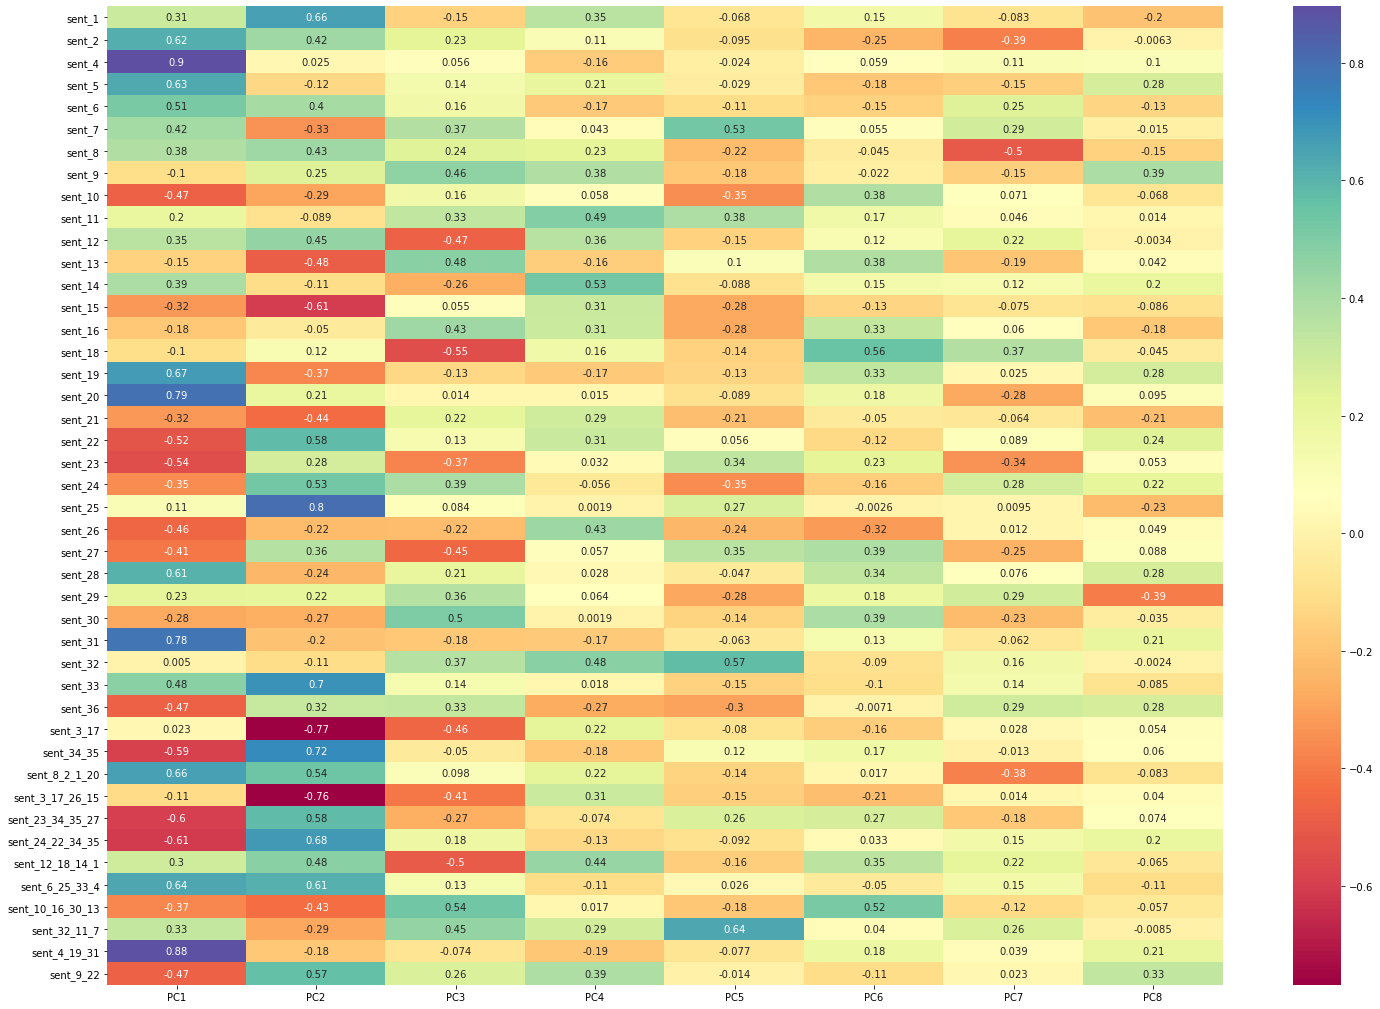

In [35]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,18))

ax = sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.show()

In [36]:
pd.set_option('display.max_rows', 20)


PC1_TOP = loading_matrix.nlargest(7, ['PC1']) 
PC1_BOT = loading_matrix.nsmallest(7, ['PC1']) 

a = PC1_TOP.append(PC1_BOT) 
a = a[['PC1']]
a

,PC1
sent_4,0.896219
sent_4_19_31,0.884476
sent_20,0.794358
sent_31,0.783847
sent_19,0.669222
sent_8_2_1_20,0.656084
sent_6_25_33_4,0.637836
sent_24_22_34_35,-0.611418
sent_23_34_35_27,-0.598811
sent_34_35,-0.586326


First component is stongly correlated with "positive" sentiments.

In [37]:
PC2_TOP = loading_matrix.nlargest(7, ['PC2']) 
PC2_BOT = loading_matrix.nsmallest(7, ['PC2']) 

a = PC2_TOP.append(PC2_BOT) 
a = a[['PC2']]
a

,PC2
sent_25,0.802912
sent_34_35,0.715948
sent_33,0.699816
sent_24_22_34_35,0.680201
sent_1,0.660762
sent_6_25_33_4,0.613021
sent_23_34_35_27,0.581344
sent_3_17,-0.768095
sent_3_17_26_15,-0.764027
sent_15,-0.605431


The second component is positively correlated with "thrilling"  and dramatic  and negatively correlated with "romantic" and easy-going movieands.

In [38]:
PC3_TOP = loading_matrix.nlargest(7, ['PC3']) 
PC3_BOT = loading_matrix.nsmallest(7, ['PC3']) 

a = PC3_TOP.append(PC3_BOT) 
a = a[['PC3']]
a

,PC3
sent_10_16_30_13,0.537739
sent_30,0.499943
sent_13,0.480131
sent_9,0.464816
sent_32_11_7,0.450065
sent_16,0.425213
sent_24,0.394724
sent_18,-0.545181
sent_12_18_14_1,-0.500754
sent_12,-0.469388


The third PC seems related with "original" and "exciting" movies, while it's negative correlated with horror, unoriginal and romantic movies.

In [39]:
PC4_TOP = loading_matrix.nlargest(7, ['PC4']) 
PC4_BOT = loading_matrix.nsmallest(7, ['PC4']) 

a = PC4_TOP.append(PC4_BOT) 
a = a[['PC4']]
a

,PC4
sent_14,0.528374
sent_11,0.489484
sent_32,0.475332
sent_12_18_14_1,0.441703
sent_26,0.430887
sent_9_22,0.389036
sent_9,0.378139
sent_36,-0.270482
sent_4_19_31,-0.188328
sent_34_35,-0.180918


The 4th PC seems positively related to romantic movies. The negative corroletaions is for horror and sad movies

In [40]:
PC5_TOP = loading_matrix.nlargest(7, ['PC5']) 
PC5_BOT = loading_matrix.nsmallest(7, ['PC5']) 

a = PC5_TOP.append(PC5_BOT) 
a = a[['PC5']]
a

,PC5
sent_32_11_7,0.639447
sent_32,0.572261
sent_7,0.531784
sent_11,0.382850
sent_27,0.354638
sent_23,0.337443
sent_25,0.267364
sent_24,-0.352296
sent_10,-0.351510
sent_36,-0.298355


I assume this is the Principal component related to romantic comedies and fastpaced movies.

In [41]:
PC6_TOP = loading_matrix.nlargest(7, ['PC6']) 
PC6_BOT = loading_matrix.nsmallest(7, ['PC6']) 

a = PC6_TOP.append(PC6_BOT) 
a = a[['PC6']]
a

,PC6
sent_18,0.557901
sent_10_16_30_13,0.515798
sent_30,0.394591
sent_27,0.388666
sent_13,0.378239
sent_10,0.377494
sent_12_18_14_1,0.347920
sent_26,-0.318769
sent_2,-0.246508
sent_3_17_26_15,-0.209098


I assume this is the component most related to fantasy movies (imaginative, fake, unrelatable) and negatively correlated with movies based on a real history ("relatable, real, outrageous).

In [42]:
PC7_TOP = loading_matrix.nlargest(7, ['PC7']) 
PC7_BOT = loading_matrix.nsmallest(7, ['PC7']) 

a = PC7_TOP.append(PC7_BOT) 
a = a[['PC7']]
a

,PC7
sent_18,0.370955
sent_36,0.294096
sent_29,0.288195
sent_7,0.288072
sent_24,0.280493
sent_32_11_7,0.262585
sent_6,0.252480
sent_8,-0.501738
sent_2,-0.389392
sent_8_2_1_20,-0.382158


Informative and real are positive correlated, so I assume this PC is related to documentaries or movies based on real stories. It's negative correlated to romantic movies.

In [43]:
PC8_TOP = loading_matrix.nlargest(7, ['PC8']) 
PC8_BOT = loading_matrix.nsmallest(7, ['PC8']) 

a = PC8_TOP.append(PC8_BOT) 
a = a[['PC8']]
a

,PC8
sent_9,0.394355
sent_9_22,0.334408
sent_19,0.284782
sent_28,0.275917
sent_36,0.275770
sent_5,0.275042
sent_22,0.242272
sent_29,-0.394020
sent_25,-0.226362
sent_21,-0.214093


The 8th PC seems positively related to sad and dramatic movies, and negatively related to horror movies

### KNN with PCA

In [44]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Elbow method for cluster number

In [45]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(movie_PCA)
    Sum_of_squared_distances.append(km.inertia_)

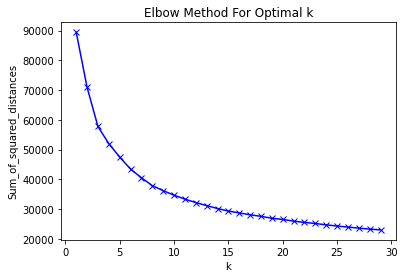

In [46]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### silhouette method for cluster number

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_coefficients = []
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(movie_PCA)
    score = silhouette_score(movie_PCA, km.labels_)
    silhouette_coefficients.append(score)

# silhouette_coefficients

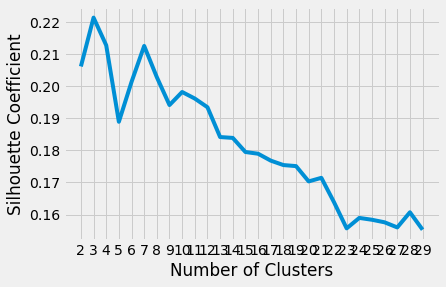

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

According to the Elbow method and the silouhette method, The optimal number of cluster should be between 6 and 8.

In [49]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=6,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km6 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [50]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=7,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km7 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [51]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=8,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km8 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [52]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=9,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km9 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [53]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=10,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km10 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [54]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=11,
    n_init=10,
    max_iter=600,
    random_state=42
)

kmeans.fit(movie_PCA)
km11 = kmeans.labels_

# movie_PCA['KM3'] = km3
# movie_PCA['KM4'] = km4
# movie_PCA

In [55]:
df_temp = movie_PCA.copy()


df_temp['KM6'] = km6
df_temp['KM7'] = km7
df_temp['KM8'] = km8
df_temp['KM9'] = km9
df_temp['KM10'] = km10
df_temp['KM11'] = km11

## Visualization of K-means' clusters along PC1 and PC2

#### k = 6

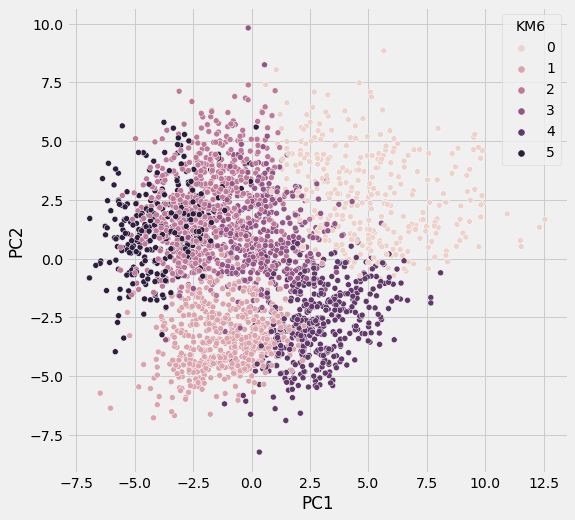

In [56]:
plt.figure(figsize=(8, 8))

g =sns.scatterplot(x="PC1", y="PC2",
              hue="KM6",
              data=df_temp);

#### k = 7

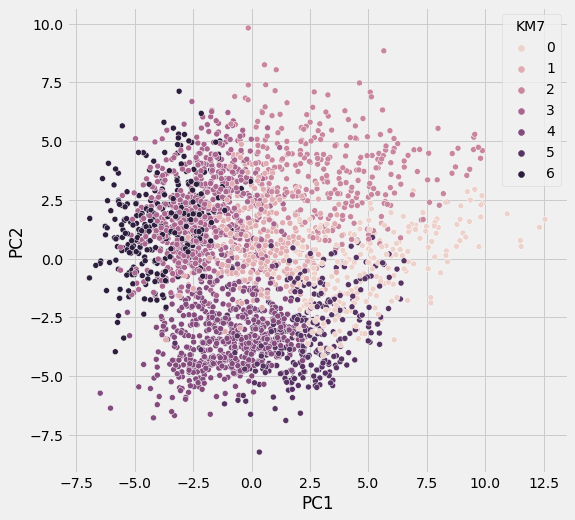

In [57]:
plt.figure(figsize=(8, 8))

g =sns.scatterplot(x="PC1", y="PC2",
              hue="KM7",
              data=df_temp);

### k=8

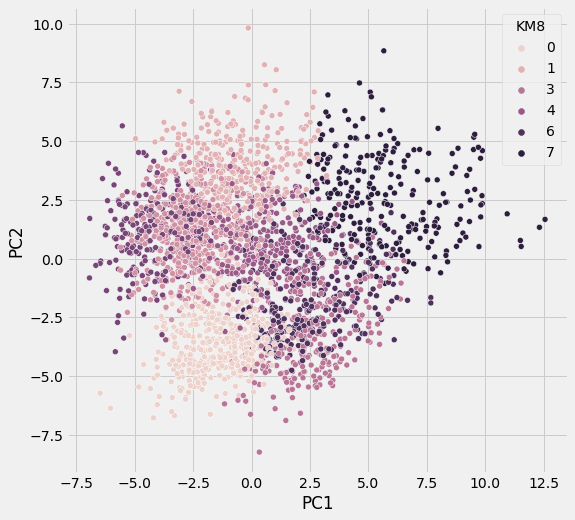

In [58]:
plt.figure(figsize=(8, 8))
g =sns.scatterplot(x="PC1", y="PC2",
              hue="KM8",
              data=df_temp);

### Gaussian Mixture Models with PCA

### Selecting clusters with BIC / AIC minimization

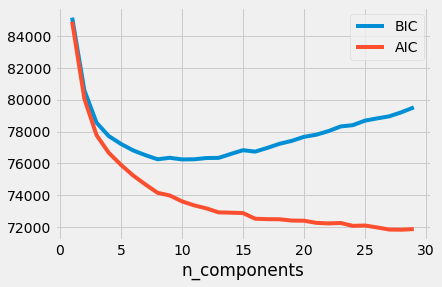

In [59]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(movie_PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(movie_PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(movie_PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

According to the AIC/BIC statistics, the optimal number of clusters should be between 7 and 10

In [60]:

gmm = GaussianMixture(n_components=7).fit(movie_PCA)
GMM7_PCA = gmm.predict(movie_PCA)

gmm = GaussianMixture(n_components=8).fit(movie_PCA)
GMM8_PCA = gmm.predict(movie_PCA)

gmm = GaussianMixture(n_components=9).fit(movie_PCA)
GMM9_PCA = gmm.predict(movie_PCA)

gmm = GaussianMixture(n_components=10).fit(movie_PCA)
GMM10_PCA = gmm.predict(movie_PCA)

In [61]:
df_temp = movie_PCA.copy()
 
df_temp['GMM7_PCA'] = GMM7_PCA
df_temp['GMM8_PCA'] = GMM8_PCA
df_temp['GMM9_PCA'] = GMM9_PCA
df_temp['GMM10_PCA'] = GMM10_PCA


df_temp['GMM7_PCA'] = df_temp['GMM7_PCA'].astype('category')
df_temp['GMM8_PCA'] = df_temp['GMM8_PCA'].astype('category')
df_temp['GMM9_PCA'] = df_temp['GMM9_PCA'].astype('category')
df_temp['GMM10_PCA'] = df_temp['GMM10_PCA'].astype('category')

df_temp.dtypes

PC1           float64
PC2           float64
PC3           float64
PC4           float64
PC5           float64
PC6           float64
PC7           float64
PC8           float64
GMM7_PCA     category
GMM8_PCA     category
GMM9_PCA     category
GMM10_PCA    category
dtype: object

## Visualizing GMM's Clusters using PC1 and PC2

##### n_components = 7

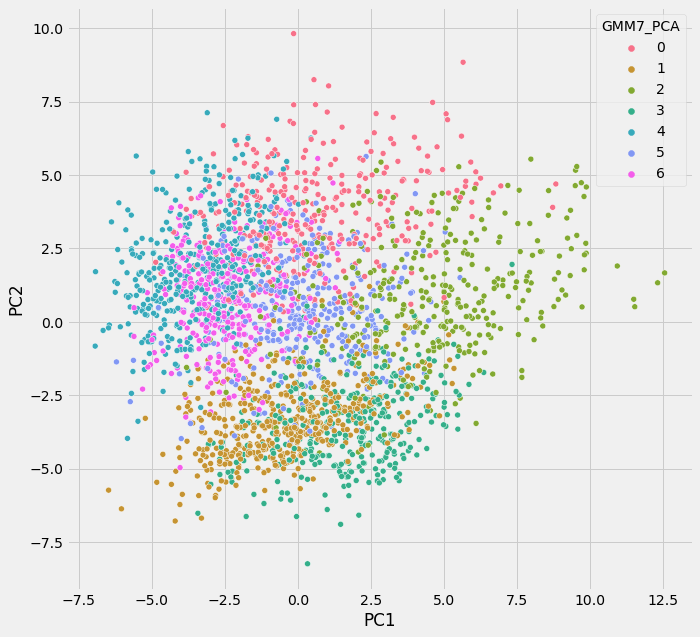

In [62]:
plt.figure(figsize=(10, 10))


g =sns.scatterplot(x="PC1", y="PC2",
              hue="GMM7_PCA",
              data=df_temp);

##### n_components = 8

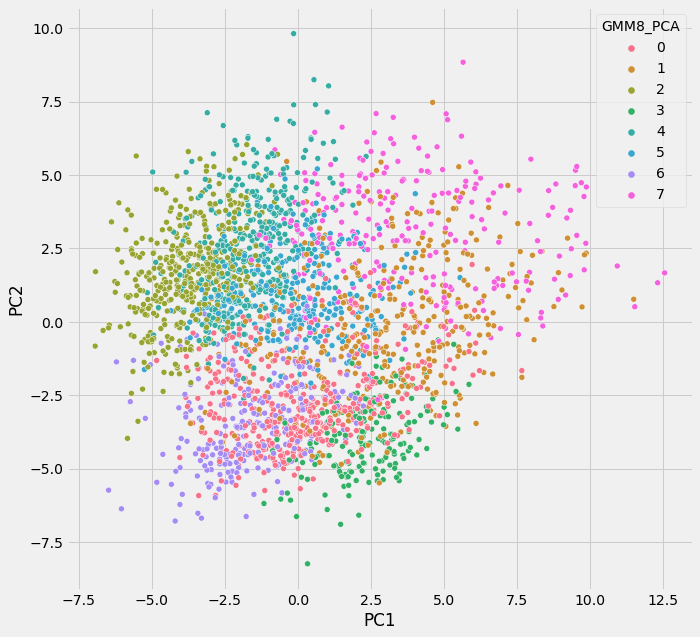

In [63]:
plt.figure(figsize=(10, 10))


g =sns.scatterplot(x="PC1", y="PC2",
              hue="GMM8_PCA",
              data=df_temp);

##### n_components = 9

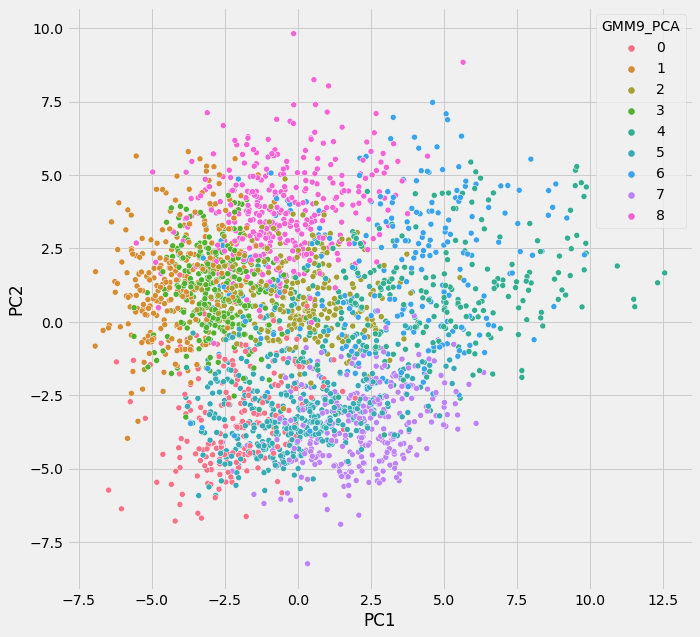

In [64]:
plt.figure(figsize=(10, 10))


g =sns.scatterplot(x="PC1", y="PC2",
              hue="GMM9_PCA",
              data=df_temp);

##### n_components = 10

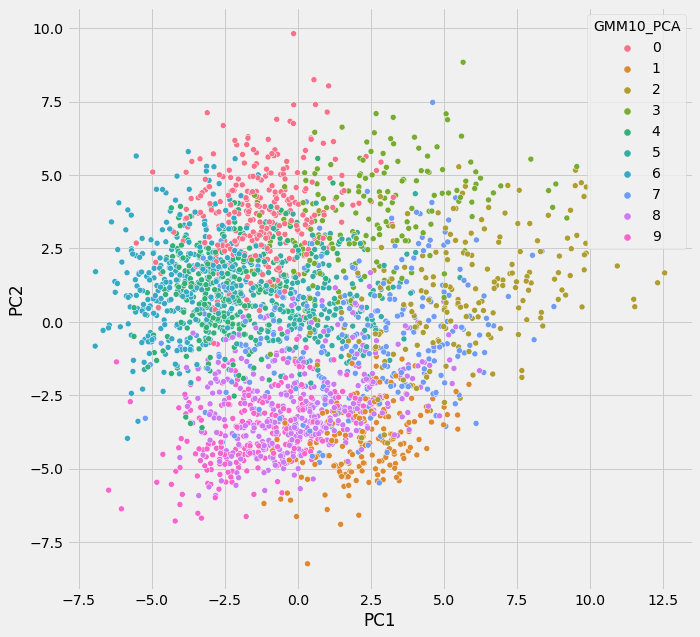

In [65]:
plt.figure(figsize=(10, 10))


g =sns.scatterplot(x="PC1", y="PC2",
              hue="GMM10_PCA",
              data=df_temp);

### Hierarchical Clustering With PCA

#### Ward Distance 

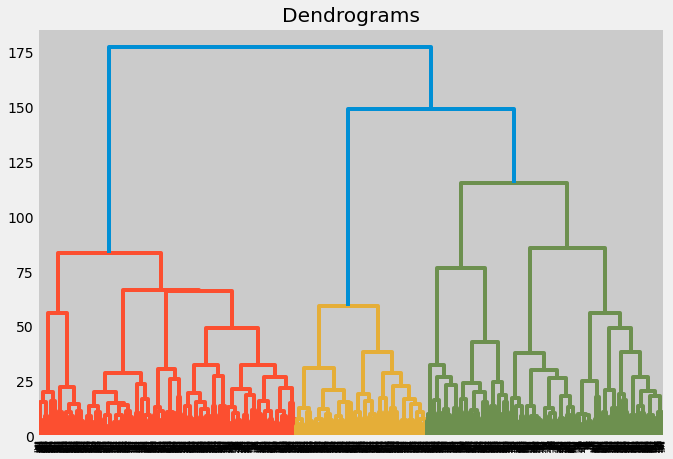

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(movie_PCA, method='ward', metric='euclidean'))

#### Elbow Method

In [67]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np



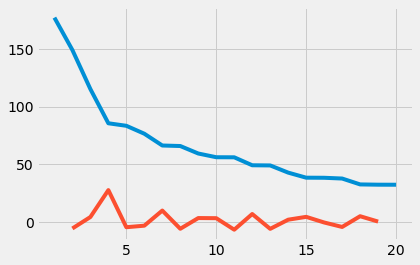

In [68]:
Z2 = linkage(movie_PCA, method='ward', metric='euclidean')
last = Z2[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters


The optimal number seems to be between 8 ad 10

In [69]:
from scipy.cluster.hierarchy import fcluster

k=8
ward_8 = fcluster(Z2, k, criterion='maxclust')

k=9
ward_9 = fcluster(Z2, k, criterion='maxclust')

k=10
ward_10 = fcluster(Z2, k, criterion='maxclust')

k=11
ward_11 = fcluster(Z2, k, criterion='maxclust')

k=12
ward_12 = fcluster(Z2, k, criterion='maxclust')

In [70]:
df_temp = movie_PCA.copy()

df_temp['ward_8'] = ward_8
df_temp['ward_9'] = ward_9
df_temp['ward_10'] = ward_10
df_temp['ward_11'] = ward_11
df_temp['ward_12'] = ward_12


df_temp.dtypes

PC1        float64
PC2        float64
PC3        float64
PC4        float64
PC5        float64
PC6        float64
PC7        float64
PC8        float64
ward_8       int32
ward_9       int32
ward_10      int32
ward_11      int32
ward_12      int32
dtype: object

In [71]:
movie_PCA['KM6'] = km6
movie_PCA['KM7'] = km7
movie_PCA['KM8'] = km8
movie_PCA['KM9'] = km9
movie_PCA['KM10'] = km10
movie_PCA['KM11'] = km11

movie_PCA['GMM7_PCA'] = GMM7_PCA
movie_PCA['GMM8_PCA'] = GMM8_PCA
movie_PCA['GMM9_PCA'] = GMM9_PCA
movie_PCA['GMM10_PCA'] = GMM10_PCA

movie_PCA['ward_8'] = ward_8
movie_PCA['ward_9'] = ward_9
movie_PCA['ward_10'] = ward_10
movie_PCA['ward_11'] = ward_11
movie_PCA['ward_12'] = ward_12

movie_PCA.dtypes

PC1        float64
PC2        float64
PC3        float64
PC4        float64
PC5        float64
            ...   
ward_8       int32
ward_9       int32
ward_10      int32
ward_11      int32
ward_12      int32
Length: 23, dtype: object

In [72]:
clusters = movie_PCA.drop(movie_PCA.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis=1)
clusters.head()

,KM6,KM7,KM8,KM9,KM10,KM11,GMM7_PCA,GMM8_PCA,GMM9_PCA,GMM10_PCA,ward_8,ward_9,ward_10,ward_11,ward_12
movie_id,,,,,,,,,,,,,,,
8984,3,5,4,1,9,2,5,3,7,1,8,9,10,11,12
8985,4,5,3,4,8,4,3,3,7,1,8,9,10,11,12
8986,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11
8987,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11
8988,3,1,4,1,9,2,5,5,2,5,7,8,9,9,10


In [73]:
clusters.reset_index(level=0, inplace=True)
clusters

,movie_id,KM6,KM7,KM8,KM9,KM10,KM11,GMM7_PCA,GMM8_PCA,GMM9_PCA,GMM10_PCA,ward_8,ward_9,ward_10,ward_11,ward_12
0,8984,3,5,4,1,9,2,5,3,7,1,8,9,10,11,12
1,8985,4,5,3,4,8,4,3,3,7,1,8,9,10,11,12
2,8986,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11
3,8987,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11
4,8988,3,1,4,1,9,2,5,5,2,5,7,8,9,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,13526,1,4,0,6,6,9,1,6,0,9,4,5,6,6,7
2614,13527,2,3,1,3,0,7,0,4,8,0,3,4,4,4,5
2615,13528,5,6,5,5,3,6,4,2,1,6,1,1,1,1,2
2616,13529,2,3,2,3,4,5,6,4,8,4,3,3,3,3,4


In [74]:
movie_sent.reset_index(level=0, inplace=True)
movie_sent.head()

,movie_id,sent_1,sent_2,sent_4,sent_5,sent_6,sent_7,sent_8,sent_9,sent_10,sent_11,sent_12,sent_13,sent_14,sent_15,sent_16,sent_18,sent_19,sent_20,sent_21,sent_22,sent_23,sent_24,sent_25,sent_26,sent_27,sent_28,sent_29,sent_30,sent_31,sent_32,sent_33,sent_36,sent_3_17,sent_34_35,sent_8_2_1_20,sent_3_17_26_15,sent_23_34_35_27,sent_24_22_34_35,sent_12_18_14_1,sent_6_25_33_4,sent_10_16_30_13,sent_32_11_7,sent_4_19_31,sent_9_22
0,8984,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,0.189474,0.168421,0.073684,0.052632,0.021053,0.115789,0.242105,0.168421,0.021053,0.094737,0.073684,0.031579,0.210526,0.021053,0.252632,0.126316,0.073684,0.073684,0.063158,0.115789,0.063158,0.052632,0.357895,0.157895,0.176316,0.143860,0.161404,0.084211,0.142105,0.147368,0.071053,0.217544,0.182456,0.094737
1,8985,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,0.237500,0.175000,0.100000,0.025000,0.025000,0.150000,0.250000,0.237500,0.012500,0.050000,0.037500,0.050000,0.200000,0.012500,0.162500,0.112500,0.050000,0.075000,0.137500,0.087500,0.025000,0.025000,0.362500,0.050000,0.165625,0.133333,0.083333,0.043750,0.156250,0.131250,0.081250,0.220833,0.220833,0.043750
2,8986,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,0.144330,0.185567,0.082474,0.082474,0.010309,0.051546,0.340206,0.144330,0.010309,0.030928,0.020619,0.000000,0.092784,0.000000,0.195876,0.185567,0.082474,0.072165,0.237113,0.061856,0.030928,0.000000,0.360825,0.051546,0.087629,0.147766,0.089347,0.020619,0.095361,0.095361,0.074742,0.230241,0.274914,0.015464
3,8987,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,0.178947,0.242105,0.073684,0.052632,0.042105,0.052632,0.326316,0.157895,0.031579,0.010526,0.000000,0.000000,0.105263,0.000000,0.094737,0.168421,0.031579,0.052632,0.168421,0.063158,0.021053,0.010526,0.273684,0.042105,0.089474,0.108772,0.045614,0.015789,0.092105,0.113158,0.097368,0.228070,0.263158,0.005263
4,8988,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,0.236559,0.107527,0.139785,0.086022,0.075269,0.129032,0.150538,0.225806,0.075269,0.129032,0.075269,0.064516,0.193548,0.032258,0.344086,0.193548,0.075269,0.086022,0.064516,0.096774,0.107527,0.075269,0.430108,0.182796,0.206989,0.182796,0.200717,0.112903,0.174731,0.142473,0.083333,0.161290,0.143369,0.096774


In [75]:
movie_sent_2 = movie_sent.merge(clusters, on='movie_id', how='left')
movie_sent_2 = movie_sent_2.merge(names, on='movie_id', how='left')
movie_sent_2 = movie_sent_2.drop_duplicates()
movie_sent_2

,movie_id,sent_1,sent_2,sent_4,sent_5,sent_6,sent_7,sent_8,sent_9,sent_10,sent_11,sent_12,sent_13,sent_14,sent_15,sent_16,sent_18,sent_19,sent_20,sent_21,sent_22,sent_23,sent_24,sent_25,sent_26,sent_27,sent_28,sent_29,sent_30,sent_31,sent_32,sent_33,sent_36,sent_3_17,sent_34_35,sent_8_2_1_20,sent_3_17_26_15,sent_23_34_35_27,sent_24_22_34_35,sent_12_18_14_1,sent_6_25_33_4,sent_10_16_30_13,sent_32_11_7,sent_4_19_31,sent_9_22,KM6,KM7,KM8,KM9,KM10,KM11,GMM7_PCA,GMM8_PCA,GMM9_PCA,GMM10_PCA,ward_8,ward_9,ward_10,ward_11,ward_12,movie_name
0,8984,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,0.189474,0.168421,0.073684,0.052632,0.021053,0.115789,0.242105,0.168421,0.021053,0.094737,0.073684,0.031579,0.210526,0.021053,0.252632,0.126316,0.073684,0.073684,0.063158,0.115789,0.063158,0.052632,0.357895,0.157895,0.176316,0.143860,0.161404,0.084211,0.142105,0.147368,0.071053,0.217544,0.182456,0.094737,3,5,4,1,9,2,5,3,7,1,8,9,10,11,12,A Brush with Love
95,8985,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,0.237500,0.175000,0.100000,0.025000,0.025000,0.150000,0.250000,0.237500,0.012500,0.050000,0.037500,0.050000,0.200000,0.012500,0.162500,0.112500,0.050000,0.075000,0.137500,0.087500,0.025000,0.025000,0.362500,0.050000,0.165625,0.133333,0.083333,0.043750,0.156250,0.131250,0.081250,0.220833,0.220833,0.043750,4,5,3,4,8,4,3,3,7,1,8,9,10,11,12,A Christmas Arrangement
175,8986,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,0.144330,0.185567,0.082474,0.082474,0.010309,0.051546,0.340206,0.144330,0.010309,0.030928,0.020619,0.000000,0.092784,0.000000,0.195876,0.185567,0.082474,0.072165,0.237113,0.061856,0.030928,0.000000,0.360825,0.051546,0.087629,0.147766,0.089347,0.020619,0.095361,0.095361,0.074742,0.230241,0.274914,0.015464,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11,A Christmas for the Books
272,8987,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,0.178947,0.242105,0.073684,0.052632,0.042105,0.052632,0.326316,0.157895,0.031579,0.010526,0.000000,0.000000,0.105263,0.000000,0.094737,0.168421,0.031579,0.052632,0.168421,0.063158,0.021053,0.010526,0.273684,0.042105,0.089474,0.108772,0.045614,0.015789,0.092105,0.113158,0.097368,0.228070,0.263158,0.005263,4,5,3,4,8,4,3,3,7,1,8,9,10,10,11,A Christmas in Tennessee
367,8988,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,0.236559,0.107527,0.139785,0.086022,0.075269,0.129032,0.150538,0.225806,0.075269,0.129032,0.075269,0.064516,0.193548,0.032258,0.344086,0.193548,0.075269,0.086022,0.064516,0.096774,0.107527,0.075269,0.430108,0.182796,0.206989,0.182796,0.200717,0.112903,0.174731,0.142473,0.083333,0.161290,0.143369,0.096774,3,1,4,1,9,2,5,5,2,5,7,8,9,9,10,A Feeling of Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234446,13526,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,0.347368,0.031579,0.073684,0.221053,0.021053,0.136842,0.073684,0.063158,0.084211,0.189474,0.221053,0.031579,0.105263,0.221053,0.189474,0.010526,0.031579,0.010526,0.031579,0.157895,0.010526,0.010526,0.821053,0.042105,0.042105,0.421053,0.150877,0.068421,0.150000,0.047368,0.026316,0.084211,0.049123,0.100000,1,4,0,6,6,9,1,6,0,9,4,5,6,6,7,Fast Times at Ridgemont High
234541,13527,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,0.483516,0.032967,0.076923,0.010989,0.000000,0.263736,0.010989,0.032967,0.010989,0.406593,0.362637,0.186813,0.461538,0.065934,0.483516,0.021978,0.021978,0.000000,0.010989,0.208791,0.208791,0.120879,0.043956,0.780220,0.104396,0.040293,0.542125,0.373626,0.288462,0.222527,0.010989,0.084249,0.040293,0.214286,2,3,1,3,0,7,0,4,8,0,3,4,4,4,5,The Girl w

In [76]:
movie_sent_2.to_csv('../movie_sent_clust.csv')